In [1]:
import pandas as pd
import numpy as np
import patsy

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import naive_bayes


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn import svm

from sklearn import naive_bayes
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_pickle('./data/mushrooms.pkl')
df.head()

,poisonous,cap-shape_bell,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-shape_convex,cap-surface_fibrous,cap-surface_smooth,cap-surface_scaly,cap-color_buff,...,population_numerous,population_scattered,population_several,population_solitary,habitat_woods,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
df.corr().applymap(abs)['poisonous'].sort_values(ascending=False).head(20)

poisonous                          1.000000
odor_foul                          0.623842
stalk-surface-above-ring_silky     0.587658
stalk-surface-below-ring_silky     0.573524
ring-type_pendant                  0.540469
gill-size_broad                    0.540024
gill-color_buff                    0.538808
bruises_yes                        0.501530
stalk-surface-above-ring_smooth    0.491314
spore-print-color_chocolate        0.490229
ring-type_large                    0.451619
population_several                 0.443722
stalk-surface-below-ring_smooth    0.425444
spore-print-color_brown            0.416645
spore-print-color_black            0.396832
spore-print-color_white            0.357384
gill-spacing_crowded               0.348387
habitat_paths                      0.323346
gill-color_brown                   0.288943
odor_fishy                         0.286360
Name: poisonous, dtype: float64

In [15]:
for col in df.columns:
    print(col)

poisonous
cap-shape_bell
cap-shape_conical
cap-shape_flat
cap-shape_knobbed
cap-shape_sunken
cap-shape_convex
cap-surface_fibrous
cap-surface_grooves
cap-surface_smooth
cap-surface_scaly
cap-color_buff
cap-color_cinnamon
cap-color_red
cap-color_gray
cap-color_brown
cap-color_pink
cap-color_green
cap-color_purple
cap-color_white
cap-color_yellow
bruises_no
bruises_yes
odor_almond
odor_creosote
odor_foul
odor_anise
odor_musty
odor_none
odor_pungent
odor_spicy
odor_fishy
gill-attachment_attached
gill-attachment_free
gill-spacing_close
gill-spacing_crowded
gill-size_broad
gill-size_narrow
gill-color_buff
gill-color_red
gill-color_gray
gill-color_chocolate
gill-color_black
gill-color_brown
gill-color_orange
gill-color_pink
gill-color_green
gill-color_purple
gill-color_white
gill-color_yellow
stalk-shape_enlarging
stalk-shape_tapering
stalk-root_missing
stalk-root_bulbous
stalk-root_club
stalk-root_equal
stalk-root_rooted
stalk-surface-above-ring_fibrous
stalk-surface-above-ring_silky
stalk-

In [18]:
def model_scores(clf, xtrain, ytrain, xtest, ytest, threshold=0.5):
    clf.fit(xtrain,ytrain)
    # calculate and print scores for train
    y_true = ytrain
    y_prob = clf.predict_proba(xtrain)[:,1]
    y_pred = np.where(y_prob>threshold, 1, 0)
    train_acc=accuracy_score(y_true, y_pred)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print(classification_report(y_true, y_pred))
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(conf)
    
    # calculate and print scores for test
    test_acc=clf.score(xtest,ytest)
    y_true = ytest
    y_prob = clf.predict_proba(xtest)[:,1]
    y_pred = np.where(y_prob>threshold, 1, 0)
    test_acc=accuracy_score(y_true, y_pred)
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    print(classification_report(y_true, y_pred))
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
    print(conf)
    
    make_plots(clf,xtest,ytest,threshold)
    
def make_plots(clf,x,y,threshold=0.5):
#     fig, ax1 = plt.subplots(figsize=(6,6))

#     # These are in unitless percentages of the figure size. (0,0 is bottom left)
#     left, bottom, width, height = [0.5, 0.1, 0.4, 0.4]
#     ax2 = fig.add_axes([left, bottom, width, height])

#     plot_roc(clf,x,y,ax1)
#     plot_conf(clf,x,y,ax2,threshold)

#     plt.subplots(1,2)
    # plot ROC for both classes
#     ax = plt.subplot(1,2,1)

#     plt.figure(figsize=(4,4))
#     plot_roc(clf,x,y)
#     # plot confusion matrix
# #     ax = plt.subplot(1,2,2)
#     plt.figure(figsize=(4,4))
#     plot_conf(clf,x,y,threshold)

    plt.subplots(1,2,figsize=(8,4))
    plt.subplot(1,2,1)
    plot_roc(clf,x,y)
    # plot confusion matrix
    plt.subplot(1,2,2)
    plot_conf(clf,x,y,threshold)
    
def plot_roc(clf,x,y):

    # calculate ROC
    pos_label = 1 # roc-curve for poisonous mushrooms
    y_score=clf.predict_proba(x)[:,pos_label]
    fpr, tpr,_ = roc_curve(y, y_score, pos_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,'k',linewidth=3,alpha=0.5)
    pos_label = 0 # roc-curve for edible mushrooms
    y_score=clf.predict_proba(x)[:,pos_label]
    fpr, tpr,_ = roc_curve(y, y_score, pos_label)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,tpr,'r',linewidth=3,alpha=0.5)
    
    plt.plot([0,1],[0,1],'k:')
    plt.legend(['poisonous','edible'],fontsize=12)
    plt.xlabel('FPR',fontsize=12,fontweight='bold')
    plt.ylabel('TPR',fontsize=12,fontweight='bold')
    plt.axis('scaled')
    plt.tight_layout()

def plot_roc_simple(clf,x,y,pos_label=0):
    
    # calculate ROC
    y_score=clf.predict_proba(x)[:,pos_label]
    fpr, tpr,_ = roc_curve(y, y_score, pos_label)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr,tpr,linewidth=5, alpha=0.5)

    
def plot_conf(clf,x,y,threshold=0.5):
    
    y_true = y
    y_prob = clf.predict_proba(x)[:,1]
    y_pred = np.where(y_prob>threshold, 1, 0)
    conf = confusion_matrix(y_true, y_pred, labels=[1,0])
#     print(conf)
    
    # plot confusion matrix
    plt.imshow(conf, interpolation='nearest',cmap=plt.cm.bone_r)
    plt.text(0,0,conf[0][0],fontsize=21,fontweight='bold',color='w',ha='center')
    plt.text(1,0,conf[0][1],fontsize=21,fontweight='bold',color='#CC0000',ha='center')
    plt.text(0,1,conf[1][0],fontsize=21,fontweight='bold',color='#88CC00',ha='center')
    plt.text(1,1,conf[1][1],fontsize=21,fontweight='bold',color='w',ha='center')
    ax = plt.gca()
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Poisonous\n(Predicted)','Edible\n(Predicted)'],fontsize=12)
    ax.set_yticks([0,1])
    ax.set_yticklabels(['Poisonous\n(True)','Edible\n(True)'],fontsize=12)
    plt.tight_layout()

In [21]:
data = df
X = data.iloc[:,1:]
y = data.iloc[:,0]

xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify=y, test_size=0.3, random_state=432)
threshold = 0.1

### Logistic Regression

Training Data Accuracy: 0.99
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      2945
          1       0.99      1.00      0.99      2741

avg / total       0.99      0.99      0.99      5686

[[2741    0]
 [  35 2910]]
Test Data Accuracy:     0.99
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      1263
          1       0.98      1.00      0.99      1175

avg / total       0.99      0.99      0.99      2438

[[1175    0]
 [  26 1237]]


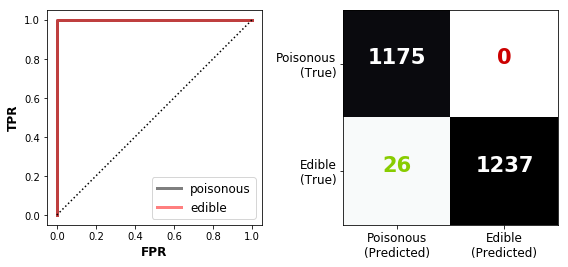

In [22]:
lr = LogisticRegression(class_weight='balanced')
model_scores(lr, xtrain, ytrain, xtest, ytest, threshold)

{'C': 1.6681005372000592}
Training Data Accuracy: 1.00
             precision    recall  f1-score   support

          0       1.00      0.99      1.00      2945
          1       0.99      1.00      1.00      2741

avg / total       1.00      1.00      1.00      5686

[[2741    0]
 [  16 2929]]
Test Data Accuracy:     1.00
             precision    recall  f1-score   support

          0       1.00      0.99      1.00      1263
          1       0.99      1.00      1.00      1175

avg / total       1.00      1.00      1.00      2438

[[1175    0]
 [  11 1252]]


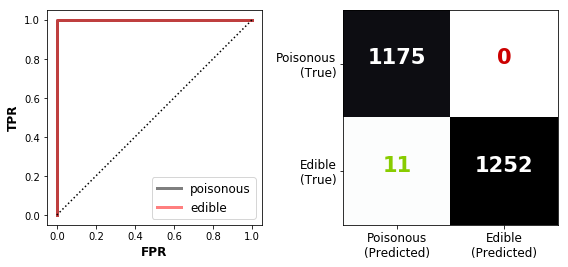

In [23]:
gs = GridSearchCV(estimator=LogisticRegression(class_weight='balanced'), 
                  param_grid={'C': np.logspace(-2,3,num=10)}, 
                  scoring='roc_auc',
                  n_jobs=-1)
gs.fit(xtrain,ytrain)
print(gs.best_params_)
lr = gs.best_estimator_
model_scores(lr, xtrain, ytrain, xtest, ytest, threshold)

### Decision Tree

Training Data Accuracy: 1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2945
          1       1.00      1.00      1.00      2741

avg / total       1.00      1.00      1.00      5686

[[2741    0]
 [   0 2945]]
Test Data Accuracy:     1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1263
          1       1.00      1.00      1.00      1175

avg / total       1.00      1.00      1.00      2438

[[1175    0]
 [   0 1263]]


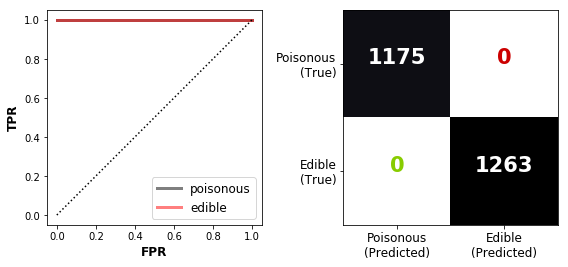

In [26]:
dt = DecisionTreeClassifier(max_depth=8,class_weight='balanced')
model_scores(dt, xtrain, ytrain, xtest, ytest, threshold)

{'max_depth': 9}
Training Data Accuracy: 1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2945
          1       1.00      1.00      1.00      2741

avg / total       1.00      1.00      1.00      5686

[[2741    0]
 [   0 2945]]
Test Data Accuracy:     1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1263
          1       1.00      1.00      1.00      1175

avg / total       1.00      1.00      1.00      2438

[[1175    0]
 [   0 1263]]


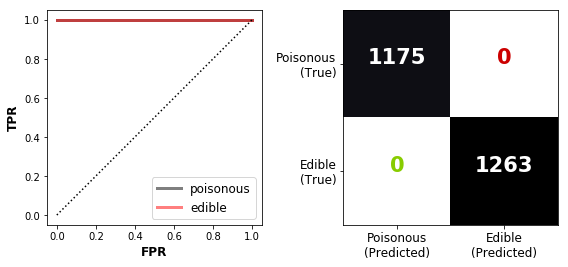

In [27]:
gs = GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'), 
                   param_grid={'max_depth': range(1,10)}, 
                   n_jobs=-1)
gs.fit(xtrain,ytrain)
print(gs.best_params_)
dt = gs.best_estimator_
model_scores(dt, xtrain, ytrain, xtest, ytest, threshold)

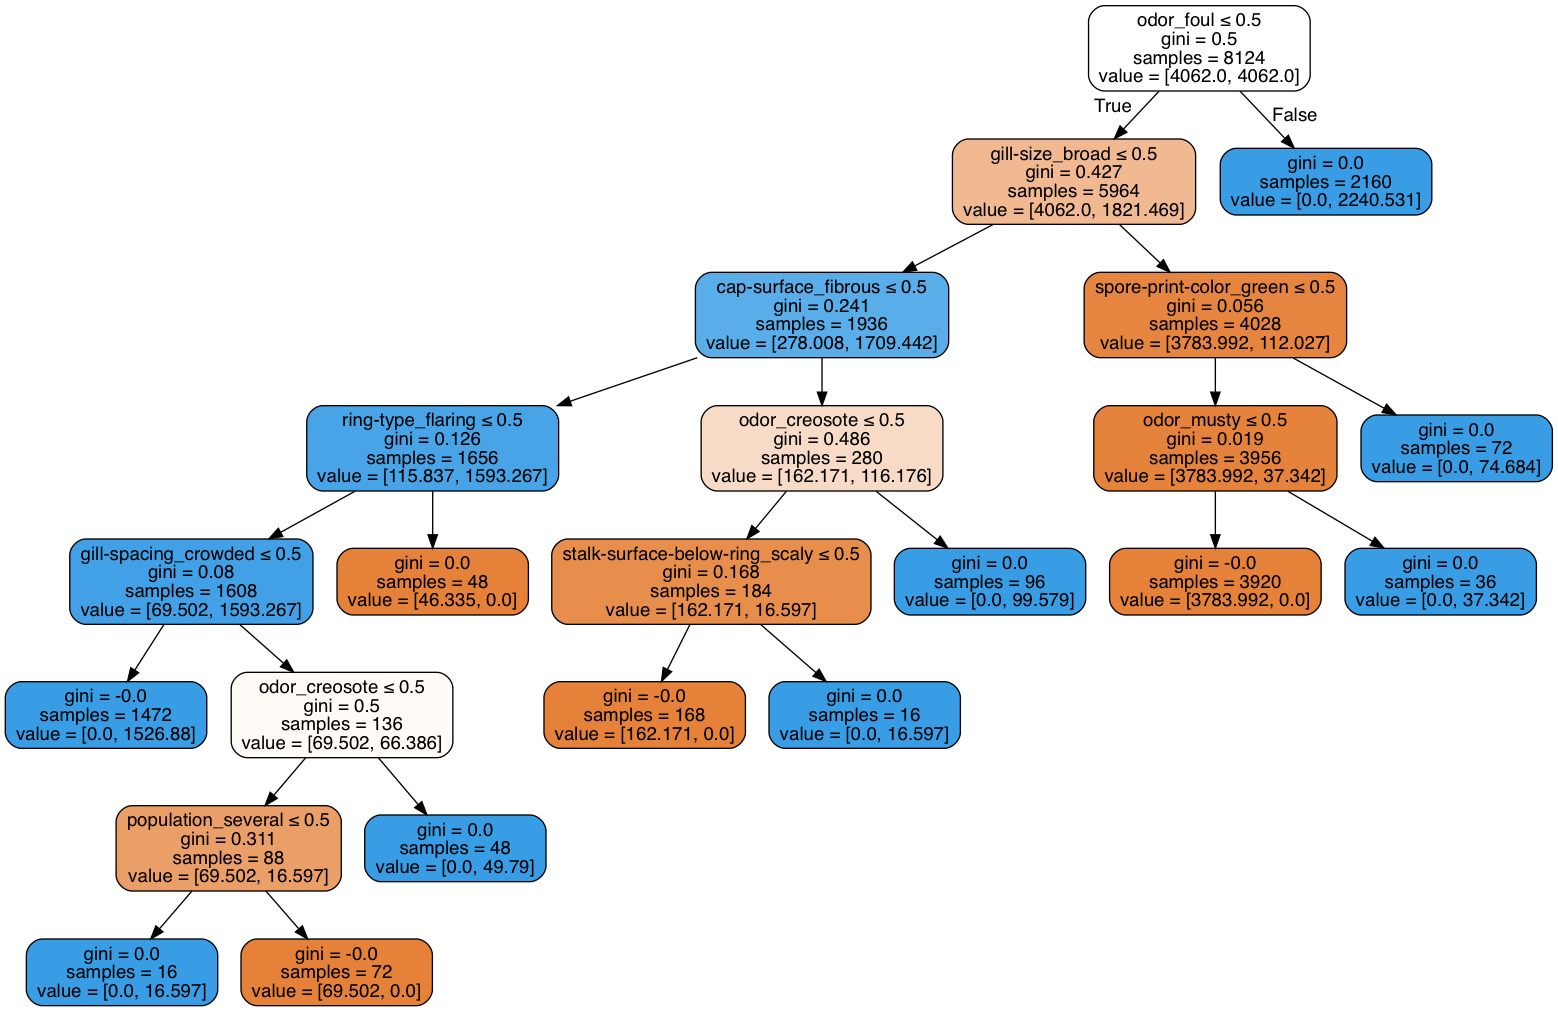

In [36]:
dot_data = StringIO()
dt.fit(X,y)
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

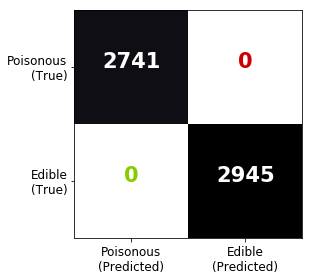

In [78]:
plot_conf(dt,xtrain,ytrain)

### Random Forest

Training Data Accuracy: 1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2945
          1       1.00      1.00      1.00      2741

avg / total       1.00      1.00      1.00      5686

[[2741    0]
 [   0 2945]]
Test Data Accuracy:     1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1263
          1       1.00      1.00      1.00      1175

avg / total       1.00      1.00      1.00      2438

[[1175    0]
 [   0 1263]]


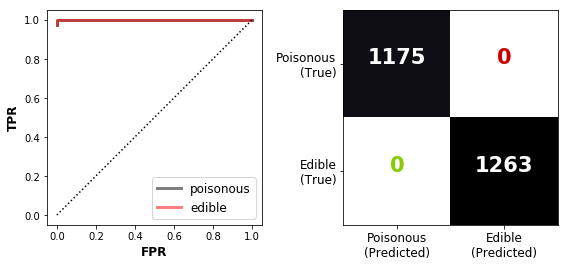

In [29]:
rf = RandomForestClassifier(n_estimators=100,class_weight='balanced')
model_scores(rf, xtrain, ytrain, xtest, ytest, threshold)

{'n_estimators': 1000}
Training Data Accuracy: 1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2945
          1       1.00      1.00      1.00      2741

avg / total       1.00      1.00      1.00      5686

[[2741    0]
 [   0 2945]]
Test Data Accuracy:     1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1263
          1       1.00      1.00      1.00      1175

avg / total       1.00      1.00      1.00      2438

[[1175    0]
 [   0 1263]]


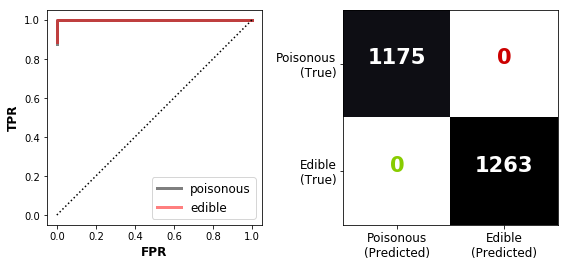

In [30]:
gs = GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                   scoring='roc_auc',
                   param_grid={'n_estimators': [10,20,50,100,250,500,1000]}, 
                   n_jobs=-1)
gs.fit(X,y)
print(gs.best_params_)
rf = gs.best_estimator_
model_scores(rf, xtrain, ytrain, xtest, ytest, threshold)

### Naive Bayes

Training Data Accuracy: 0.93
             precision    recall  f1-score   support

          0       0.90      0.97      0.93      2945
          1       0.97      0.88      0.92      2741

avg / total       0.93      0.93      0.93      5686

[[2415  326]
 [  76 2869]]
Test Data Accuracy:     0.92
             precision    recall  f1-score   support

          0       0.89      0.98      0.93      1263
          1       0.97      0.87      0.92      1175

avg / total       0.93      0.92      0.92      2438

[[1023  152]
 [  31 1232]]


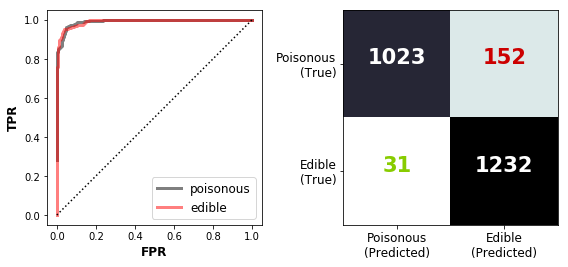

In [31]:
nb = naive_bayes.BernoulliNB()
model_scores(nb, xtrain, ytrain, xtest, ytest, threshold)

### SVM

Training Data Accuracy: 1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2945
          1       1.00      1.00      1.00      2741

avg / total       1.00      1.00      1.00      5686

[[2741    0]
 [   0 2945]]
Test Data Accuracy:     1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1263
          1       1.00      1.00      1.00      1175

avg / total       1.00      1.00      1.00      2438

[[1175    0]
 [   0 1263]]


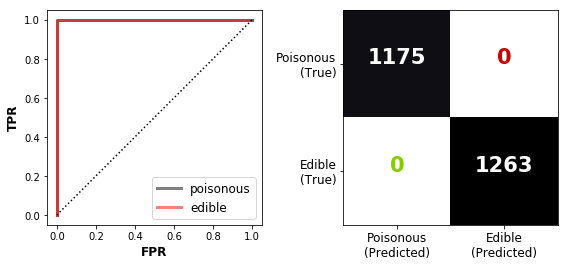

In [32]:
sv = svm.SVC(kernel='rbf', gamma = 0.1, probability=True,class_weight='balanced')
model_scores(sv, xtrain, ytrain, xtest, ytest, threshold)

{'gamma': 0.46415888336127775}
Training Data Accuracy: 1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2945
          1       1.00      1.00      1.00      2741

avg / total       1.00      1.00      1.00      5686

[[2741    0]
 [   0 2945]]
Test Data Accuracy:     1.00
             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1263
          1       1.00      1.00      1.00      1175

avg / total       1.00      1.00      1.00      2438

[[1175    0]
 [   0 1263]]


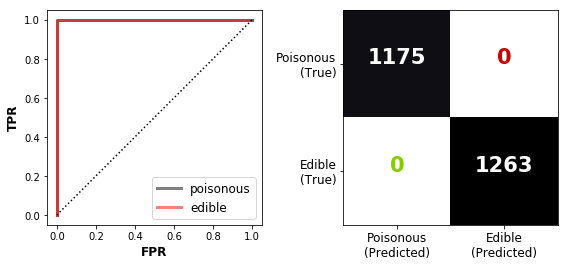

In [33]:
gs = GridSearchCV(estimator=svm.SVC(kernel='rbf', probability=True),
                   scoring='roc_auc',
                   param_grid={'gamma': np.logspace(-3,3,num=10)}, 
                   n_jobs=-1)
gs.fit(X,y)
print(gs.best_params_)
sv = gs.best_estimator_
model_scores(sv, xtrain, ytrain, xtest, ytest, threshold=0.5)

In [76]:
def tree2json(decision_tree, out_file=None, feature_names=None):
    
    import numpy as np
    from sklearn.tree import _tree

    def arr_to_py(arr):
        arr = arr.ravel()
        wrapper = float
        if np.issubdtype(arr.dtype, np.int):
            wrapper = int
        return map(wrapper, arr.tolist())


    def node_to_str(tree, node_id):
        if (tree.children_left[node_id] == tree.children_right[node_id]): # is leaf
            if tree.value[node_id].argmax()==0:
                node_repr = '"name": "Risk: low"'
            else:
                node_repr = '"name": "Risk: high"'
            print("Is a leaf",node_repr)
        else: # not leaf
            node_repr = '"name": "%s"' \
                    % (feature_names[tree.feature[node_id]])
            print("Not a leaf",node_repr)
        return node_repr

    def recurse(tree, node_id, parent=None):

        left_child = tree.children_left[node_id]
        right_child = tree.children_right[node_id]
        print(node_id,left_child,right_child)

        # Open node with description
        out_file.write('{%s' % node_to_str(tree, node_id))

        # write children
        if left_child != right_child: # not leaf
            out_file.write(', "children": [')
            recurse(tree, left_child, node_id)
            out_file.write(', ')
            recurse(tree, right_child, node_id)
            out_file.write(']')

        # close node
        out_file.write('}')

    if out_file is None:
        out_file = open("tree.json", "w")
    else:
        out_file = open(out_file, "w")

    if isinstance(decision_tree, _tree.Tree):
        recurse(decision_tree, 0)
    else:
        print('getting tree structure')
        recurse(decision_tree.tree_, 0)

    return out_file

In [77]:
out_file = tree2json(dt, out_file="full_tree.json",feature_names=X.columns)
out_file.close()

getting tree structure
0 1 22
Not a leaf "name": "odor_foul"
1 2 17
Not a leaf "name": "gill-size_broad"
2 3 12
Not a leaf "name": "cap-surface_fibrous"
3 4 11
Not a leaf "name": "ring-type_flaring"
4 5 6
Not a leaf "name": "gill-spacing_crowded"
5 -1 -1
Is a leaf "name": "Risk: high"
6 7 10
Not a leaf "name": "odor_creosote"
7 8 9
Not a leaf "name": "population_several"
8 -1 -1
Is a leaf "name": "Risk: high"
9 -1 -1
Is a leaf "name": "Risk: low"
10 -1 -1
Is a leaf "name": "Risk: high"
11 -1 -1
Is a leaf "name": "Risk: low"
12 13 16
Not a leaf "name": "odor_creosote"
13 14 15
Not a leaf "name": "stalk-surface-below-ring_scaly"
14 -1 -1
Is a leaf "name": "Risk: low"
15 -1 -1
Is a leaf "name": "Risk: high"
16 -1 -1
Is a leaf "name": "Risk: high"
17 18 21
Not a leaf "name": "spore-print-color_green"
18 19 20
Not a leaf "name": "odor_musty"
19 -1 -1
Is a leaf "name": "Risk: low"
20 -1 -1
Is a leaf "name": "Risk: high"
21 -1 -1
Is a leaf "name": "Risk: high"
22 -1 -1
Is a leaf "name": "Risk